In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [268]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing  

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [270]:
df = pd.read_csv('all_auction.csv', encoding = 'utf-8')
df.head()

開標日期    證券名稱   證券代號  發行市場      發行性質 競拍方式 競拍數量(張) 最低投標價格(元)  \
0  2020/12/7  永固一-KY  55461  櫃檯買賣  無擔保轉換公司債  美國標   6,800       100   
1  2020/12/4     信邦七  30237  櫃檯買賣  無擔保轉換公司債  美國標  11,400       101   
2  2020/12/4      達亞   6762  櫃檯買賣       初上櫃  美國標   1,660    228.37   
3  2020/12/3     森寶一  34891  櫃檯買賣  有擔保轉換公司債  美國標     900       103   
4  2020/12/2      揚秦   2755  櫃檯買賣       初上櫃  美國標   1,360        48   

   最低每標單投標數量(張) 最高投(得)標數量(張)  ...  得標總金額(元)  得標手續費率(%) 總合格件 合格投標數量(張)  \
0             1          680  ...         0        0.5    0         0   
1             1        1,140  ...         0        0.5    0         0   
2             1          238  ...         0        4.5    0         0   
3             1           90  ...         0        0.5    0         0   
4             1          178  ...         0        5.0    0         0   

  最低得標價格(元)  最高得標價格(元) 得標加權平均價格(元) 承銷價格(元) 投標最後一天平均成交價 撥券日開盤價  
0         0          0           0     0.0         NaN    NaN  
1         0          0           0     0.0         NaN    NaN  
2         0          0           0     0.0         NaN    NaN  
3         0          0           0     0.0         NaN    NaN  
4         0          0           0     0.0         NaN    NaN  

[5 rows x 24 columns]

In [271]:
df.shape

(210, 24)

## 先清理重複的資料

In [272]:
df.loc[df['最低得標價格(元)'] != 0, '證券名稱'].value_counts()

泰昇-KY    2
聯廣       2
精測       2
駐龍       1
申豐       1
        ..
意德士      1
智崴三      1
誠泰科技     1
精湛       1
吉茂精密     1
Name: 證券名稱, Length: 207, dtype: int64

In [273]:
df[df['證券名稱'] =='精測']

## 兩筆為不同事件都要考慮

開標日期 證券名稱  證券代號  發行市場  發行性質 競拍方式 競拍數量(張) 最低投標價格(元)  最低每標單投標數量(張)  \
159  2017/9/18   精測  6510  櫃檯買賣  上櫃增資  美國標   1,530  1,267.33             1   
185  2016/3/10   精測  6510  櫃檯買賣   初上櫃  美國標    1896       300             3   

    最高投(得)標數量(張)  ...       得標總金額(元)  得標手續費率(%)   總合格件 合格投標數量(張) 最低得標價格(元)  \
159          153  ...  1,772,575,830        1.0    216     1,381  1,267.33   
185          236  ...      854748380        2.5  2,667    17,457     440.2   

     最高得標價格(元) 得標加權平均價格(元)  承銷價格(元) 投標最後一天平均成交價  撥券日開盤價  
159      1,320    1,283.55  1267.33     1330.00  1250.0  
185        482      450.82   360.00      478.18   590.0  

[2 rows x 24 columns]

In [274]:
df[df['證券名稱'] =='泰昇-KY']

開標日期   證券名稱  證券代號    發行市場     發行性質 競拍方式 競拍數量(張) 最低投標價格(元)  \
183  2017/1/3  泰昇-KY  8480  集中交易市場  第一上市初上市  美國標   3,400     82.31   
209  2017/1/3  泰昇-KY  8480    集中市場  第一上市初上市  美國標    3400     82.31   

     最低每標單投標數量(張) 最高投(得)標數量(張)  ...     得標總金額(元)  得標手續費率(%)   總合格件 合格投標數量(張)  \
183             2          425  ...  381,534,290        2.5  1,066    12,763   
209             2          425  ...            0        2.5    NaN       NaN   

    最低得標價格(元)  最高得標價格(元) 得標加權平均價格(元) 承銷價格(元) 投標最後一天平均成交價 撥券日開盤價  
183    110.22        124      112.22   107.0         NaN  114.5  
209         0          0           0     0.0         NaN    NaN  

[2 rows x 24 columns]

In [275]:
## 刪掉重複的一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='泰昇-KY')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='泰昇-KY']

開標日期   證券名稱  證券代號    發行市場     發行性質 競拍方式 競拍數量(張) 最低投標價格(元)  \
183  2017/1/3  泰昇-KY  8480  集中交易市場  第一上市初上市  美國標   3,400     82.31   

     最低每標單投標數量(張) 最高投(得)標數量(張)  ...     得標總金額(元)  得標手續費率(%)   總合格件 合格投標數量(張)  \
183             2          425  ...  381,534,290        2.5  1,066    12,763   

    最低得標價格(元)  最高得標價格(元) 得標加權平均價格(元) 承銷價格(元) 投標最後一天平均成交價 撥券日開盤價  
183    110.22        124      112.22   107.0         NaN  114.5  

[1 rows x 24 columns]

In [276]:
df[df['證券名稱'] =='聯廣']

開標日期 證券名稱  證券代號    發行市場 發行性質 競拍方式 競拍數量(張) 最低投標價格(元)  最低每標單投標數量(張)  \
137  2018/3/9   聯廣  8497  集中交易市場  初上市  美國標   4,680        40             1   
145  2018/1/8   聯廣  8497  集中交易市場  初上市  美國標   4,680      47.3             1   

    最高投(得)標數量(張)  ...     得標總金額(元)  得標手續費率(%)   總合格件 合格投標數量(張) 最低得標價格(元)  \
137          672  ...  229,545,830        4.0  1,383    23,949      47.6   
145          672  ...            0        4.0    500     4,308         0   

     最高得標價格(元) 得標加權平均價格(元) 承銷價格(元) 投標最後一天平均成交價 撥券日開盤價  
137       53.1       49.05    46.0       58.53    NaN  
145          0           0     0.0       70.77    NaN  

[2 rows x 24 columns]

In [277]:
## 刪掉流標的那一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='聯廣')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='聯廣']

開標日期 證券名稱  證券代號    發行市場 發行性質 競拍方式 競拍數量(張) 最低投標價格(元)  最低每標單投標數量(張)  \
137  2018/3/9   聯廣  8497  集中交易市場  初上市  美國標   4,680        40             1   

    最高投(得)標數量(張)  ...     得標總金額(元)  得標手續費率(%)   總合格件 合格投標數量(張) 最低得標價格(元)  \
137          672  ...  229,545,830        4.0  1,383    23,949      47.6   

     最高得標價格(元) 得標加權平均價格(元) 承銷價格(元) 投標最後一天平均成交價 撥券日開盤價  
137       53.1       49.05    46.0       58.53    NaN  

[1 rows x 24 columns]

## 不考慮得標總金額為 0 的資料 (可能是流標 或 正在標)


In [278]:
index_name = df[(df['得標總金額(元)'] == '0')].index
df.drop(index_name, inplace = True)
df.shape

(199, 24)

In [279]:
sum(df['得標總金額(元)'] == '0')

0

## 得標總金額為 0 的資料:
* 羅麗芬-ky, 聯廣, 泰福-ky 流標
* 其餘則是還在進行中 (資料取自2020.11.27)

## 將股票和可轉債標示類別

In [280]:
def label_stock(row):
    if row['發行性質'] in ['有擔保轉換公司債','無擔保轉換公司債']:
        return "cb"
    else:
        return "stock"   

In [281]:
df['類別'] = df.apply(lambda row : label_stock(row), axis = 1)
print('股票: %i' %(sum(df['類別'] == 'stock')))
print('可轉債: %i' %(sum(df['類別'] == 'cb')))

股票: 173
可轉債: 26


## 將df只選出開標前知道的資訊 + 最低得標價(Y)

In [282]:
df_1 = df[['開標日期','證券名稱', '證券代號', '發行市場', '發行性質', '競拍數量(張)', '最低投標價格(元)', '最低每標單投標數量(張)','每一投標單投標處理費(元)', '得標手續費率(%)', '投標最後一天平均成交價', '最低得標價格(元)', '撥券日開盤價']]

In [283]:
df_1.shape

(199, 13)

In [284]:
df_1.isnull().apply(lambda x: sum(x))

開標日期              0
證券名稱              0
證券代號              0
發行市場              0
發行性質              0
競拍數量(張)           0
最低投標價格(元)         0
最低每標單投標數量(張)      0
每一投標單投標處理費(元)     0
得標手續費率(%)         0
投標最後一天平均成交價      51
最低得標價格(元)         0
撥券日開盤價            7
dtype: int64

In [285]:
df_1.dropna(inplace = True)
df_1.shape

(145, 13)

In [286]:
df_1.dtypes

開標日期              object
證券名稱              object
證券代號               int64
發行市場              object
發行性質              object
競拍數量(張)           object
最低投標價格(元)         object
最低每標單投標數量(張)       int64
每一投標單投標處理費(元)      int64
得標手續費率(%)        float64
投標最後一天平均成交價      float64
最低得標價格(元)         object
撥券日開盤價           float64
dtype: object

In [287]:
## 將這三個變數改為數值變數
obj_col = ['競拍數量(張)', '最低投標價格(元)', '最低得標價格(元)']
for col in obj_col:
    df_1[col] = df_1[col].apply(lambda x: x.replace(',', '')) 
    df_1[col] = df_1[col].apply(pd.to_numeric, errors = 'coerce')

df_1.isnull().apply(lambda x: sum(x))

開標日期             0
證券名稱             0
證券代號             0
發行市場             0
發行性質             0
競拍數量(張)          0
最低投標價格(元)        0
最低每標單投標數量(張)     0
每一投標單投標處理費(元)    0
得標手續費率(%)        0
投標最後一天平均成交價      0
最低得標價格(元)        0
撥券日開盤價           0
dtype: int64

In [288]:
df_1.dtypes

開標日期              object
證券名稱              object
證券代號               int64
發行市場              object
發行性質              object
競拍數量(張)            int64
最低投標價格(元)        float64
最低每標單投標數量(張)       int64
每一投標單投標處理費(元)      int64
得標手續費率(%)        float64
投標最後一天平均成交價      float64
最低得標價格(元)        float64
撥券日開盤價           float64
dtype: object

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


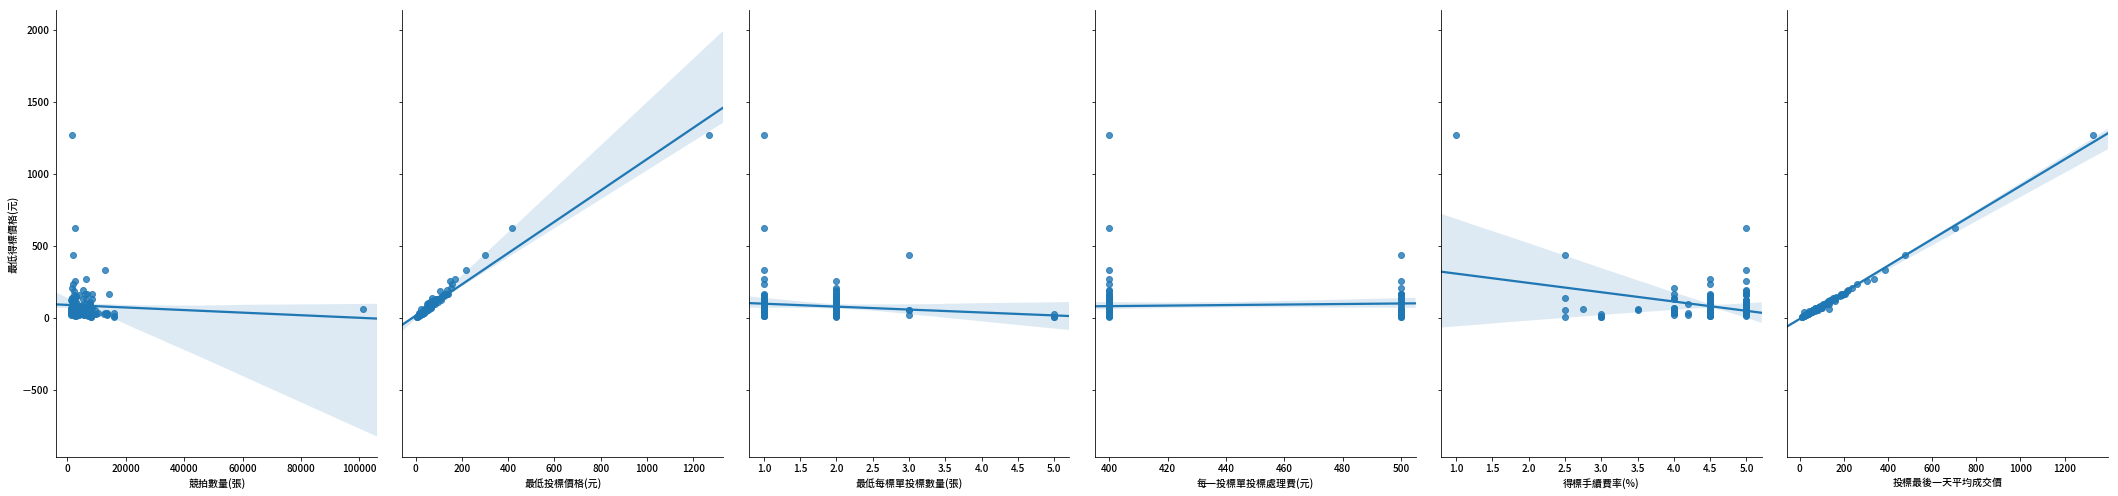

In [289]:
sn.pairplot(df_1, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

(array([ 1.,  0.,  2.,  1.,  3.,  4.,  2.,  1.,  1.,  3.,  1.,  1.,  3.,
         4.,  2.,  3.,  2.,  2.,  4.,  6., 10.,  6.,  6.,  6.,  3., 12.,
         4.,  2.,  3.,  2.,  4.,  3.,  5.,  2.,  4.,  3.,  1.,  2.,  2.,
         2.,  3.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.    ,   1.4352,   2.8704,   4.3056,   5.7408,   7.176 ,
          8.6112,  10.0464,  11.4816,  12.9168,  14.352 ,  15.7872,
         17.2224,  18.6576,  20.0928,  21.528 ,  22.9632,  24.3984,
         25.8336,  27.2688,  28.704 ,  30.1392,  31.5744,  33.0096,
         34.4448,  35.88  ,  37.3152,  38.7504,  40.1856,  41.6208,
         43.056 ,  44.4912,  45.9264,  47.3616,  48.7968,  50.232 ,
         51.6672,  53.1024

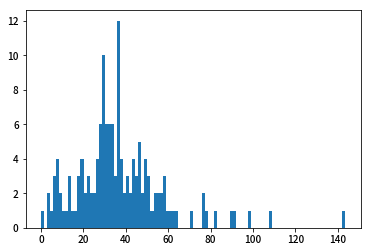

In [290]:
df_1['最低得標相對最低投標漲幅(%)'] = (df_1['最低得標價格(元)']/ df_1['最低投標價格(元)'] -1)* 100
plt.hist(df_1['最低得標相對最低投標漲幅(%)'], bins = 100)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         1.,  2.,  2.,  3.,  4.,  5.,  4.,  4.,  6.,  8.,  8., 10.,  8.,
         8.,  6.,  4.,  6.,  4.,  4.,  7.,  4.,  6.,  2.,  2.,  3.,  1.,
         2.,  1.,  0.,  0.,  0.,  1.,  0.,  3.,  0.,  3.,  0.,  1.,  1.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([-2.77142857e+01, -2.55789682e+01, -2.34436507e+01, -2.13083332e+01,
        -1.91730157e+01, -1.70376982e+01, -1.49023806e+01, -1.27670631e+01,
        -1.06317456e+01, -8.49642810e+00, -6.36111059e+00, -4.22579308e+00,
        -2.09047557e+00,  4.48419473e-02,  2.18015946e+00,  4.31547697e+00,
         6.45079448e+00,  8.58611200e+00,  1.07214295e+01,  1.28567470e+01,
         1.49920645e+01,  1.71273820e+01,  1.92626996e

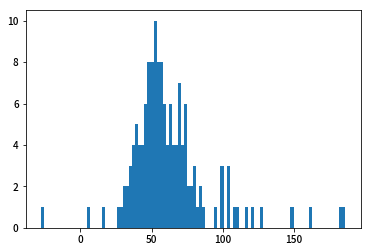

In [291]:
df_1['最後一天平均成交相對最低投標漲幅(%)'] = (df_1['投標最後一天平均成交價']/ df_1['最低投標價格(元)'] -1)* 100
plt.hist(df_1['最後一天平均成交相對最低投標漲幅(%)'], bins = 100)

(array([19., 31., 25., 23., 13.,  7.,  5.,  3.,  3.,  4.,  4.,  3.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   5.98  ,   18.5935,   31.207 ,   43.8205,   56.434 ,   69.0475,
          81.661 ,   94.2745,  106.888 ,  119.5015,  132.115 ,  144.7285,
         157.342 ,  169.9555,  182.569 ,  195.1825,  207.796 ,  220.4095,
         233.023 ,  245.6365,  258.25  ,  270.8635,  283.477 ,  296.0905,
         308.704 ,  321.3175,  333.931 ,  346.5445,  359.158 ,  371.7715,
         384.385 ,  396.9985,  409.612 ,  422.2255,  434.839 ,  

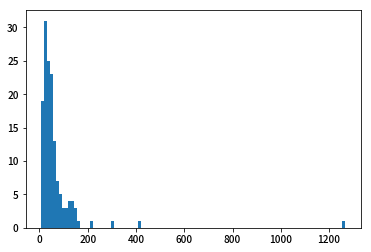

In [292]:
plt.hist(df_1['最低投標價格(元)'], bins = 100)

(array([11., 16., 25., 13., 16., 14.,  8.,  4.,  5.,  7.,  5.,  4.,  0.,
         4.,  3.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   8.92  ,   22.1308,   35.3416,   48.5524,   61.7632,   74.974 ,
          88.1848,  101.3956,  114.6064,  127.8172,  141.028 ,  154.2388,
         167.4496,  180.6604,  193.8712,  207.082 ,  220.2928,  233.5036,
         246.7144,  259.9252,  273.136 ,  286.3468,  299.5576,  312.7684,
         325.9792,  339.19  ,  352.4008,  365.6116,  378.8224,  392.0332,
         405.244 ,  418.4548,  431.6656,  444.8764,  458.0872,  

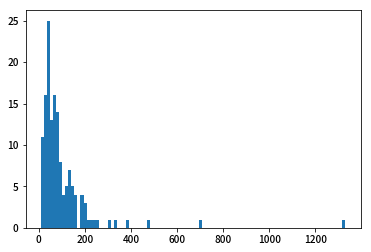

In [293]:
plt.hist(df_1['投標最後一天平均成交價'], bins = 100)

In [294]:
boxcox_x = stats.boxcox(df_1['投標最後一天平均成交價'])
print('lambda : %f' %(boxcox_x[1]))

lambda : -0.126922


(array([ 1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  2.,  2.,  3.,
         2.,  3.,  2.,  6.,  9., 10.,  6.,  1.,  3.,  7.,  8.,  9.,  9.,
         9.,  3.,  6.,  2.,  9.,  2.,  8.,  1.,  6.,  2.,  2.,  0.,  1.,
         1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([1.91068934, 1.96681043, 2.02293152, 2.07905261, 2.13517369,
        2.19129478, 2.24741587, 2.30353696, 2.35965804, 2.41577913,
        2.47190022, 2.52802131, 2.58414239, 2.64026348, 2.69638457,
        2.75250566, 2.80862675, 2.86474783, 2.92086892, 2.97699001,
        3.0331111 , 3.08923218, 3.14535327, 3.20147436, 3.25759545,
        3.31371653, 3.36983762, 3.42595871, 3.4820798 , 3.53820088,
        3.59432197, 3.65044306, 3.70656415, 3.76268523, 3.81880632,
        3.87492741, 3.9310485 , 3.98716959, 4.04329067, 4.09941176,
        4.15553285, 4.21165394, 4.26777502, 4.32389611, 4.3800172 ,
        4.43613829, 4.49225937, 4.54838046, 4.60450155, 4.66062264,
        4.71674372]),
 <a list of 50

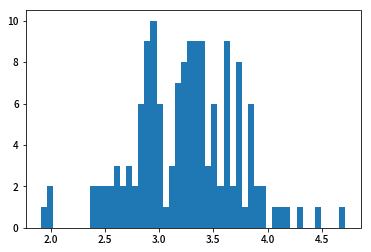

In [295]:
df_1['轉換後平均成交價'] = boxcox_x[0]
plt.hist(df_1['轉換後平均成交價'], bins = 50)

In [296]:
boxcox_y = stats.boxcox(df_1['最低投標價格(元)'])
print('lambda : %f' %(boxcox_y[1]))

lambda : -0.168904


(array([ 1.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  3.,  0.,  3.,
         5.,  3.,  4.,  6.,  3., 10.,  5.,  5.,  6.,  9.,  6.,  8., 12.,
         7.,  6.,  5.,  5.,  5.,  2.,  4.,  4.,  4.,  3.,  1.,  0.,  1.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.54356728, 1.59568221, 1.64779713, 1.69991206, 1.75202698,
        1.80414191, 1.85625684, 1.90837176, 1.96048669, 2.01260161,
        2.06471654, 2.11683146, 2.16894639, 2.22106131, 2.27317624,
        2.32529116, 2.37740609, 2.42952101, 2.48163594, 2.53375086,
        2.58586579, 2.63798071, 2.69009564, 2.74221056, 2.79432549,
        2.84644041, 2.89855534, 2.95067026, 3.00278519, 3.05490011,
        3.10701504, 3.15912996, 3.21124489, 3.26335981, 3.31547474,
        3.36758966, 3.41970459, 3.47181951, 3.52393444, 3.57604936,
        3.62816429, 3.68027921, 3.73239414, 3.78450906, 3.83662399,
        3.88873891, 3.94085384, 3.99296876, 4.04508369, 4.09719861,
        4.14931354]),
 <a list of 50

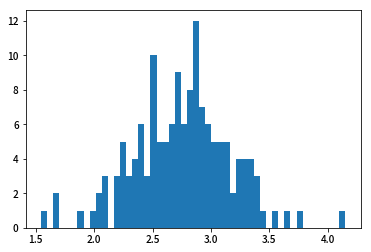

In [297]:
df_1['轉換後最低得標價格(元)'] = boxcox_y[0]
plt.hist(df_1['轉換後最低得標價格(元)'], bins = 50)

In [298]:
lam_range = np.linspace(-2,5,100)  # default nums=50
llf = np.zeros(lam_range.shape, dtype=float)
for i,lam in enumerate(lam_range):
    llf[i] = stats.boxcox_llf(lam, df_1['最低投標價格(元)'])
lam_best = lam_range[llf.argmax()]
print('Suitable lam is: ',round(lam_best,2))
print('Max llf is: ', round(llf.max(),2))    

Suitable lam is:  -0.16
Max llf is:  -509.67


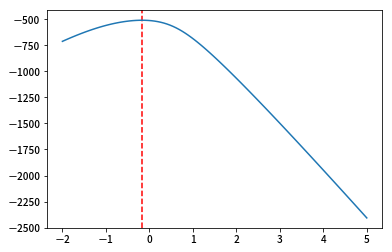

In [299]:
plt.figure()
plt.axvline(round(lam_best,2),ls="--",color="r")
plt.plot(lam_range,llf)
plt.show()

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


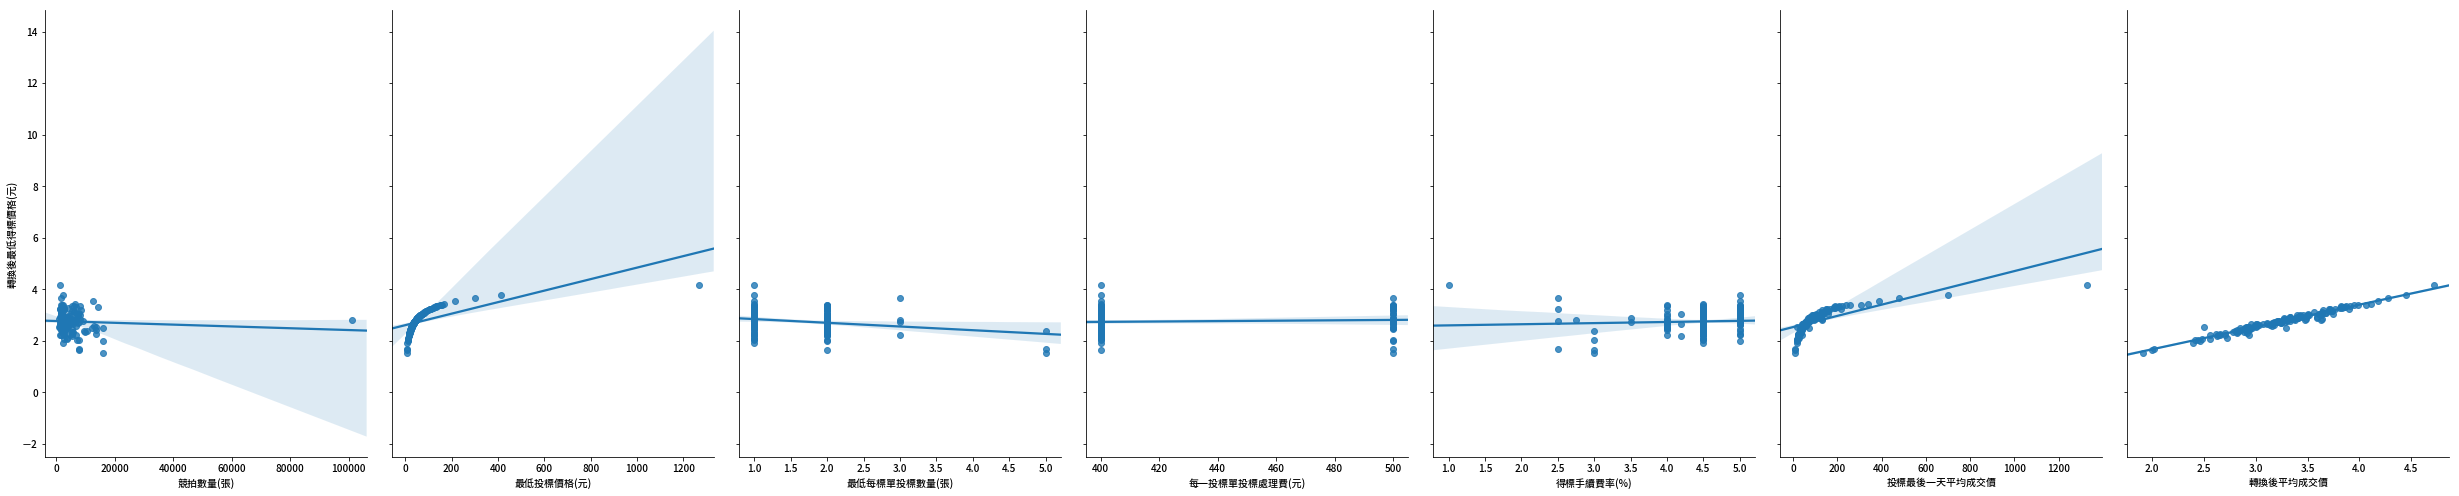

In [300]:
sn.pairplot(df_1, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價','轉換後平均成交價'], y_vars='轉換後最低得標價格(元)', size=7, aspect=0.7, kind='reg')

In [301]:
#index = df_1[outlier].index
#df_1.drop(index, inplace = True)

In [302]:
#index = df_1[outlier].index
#df_1.drop(index, inplace = True)

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


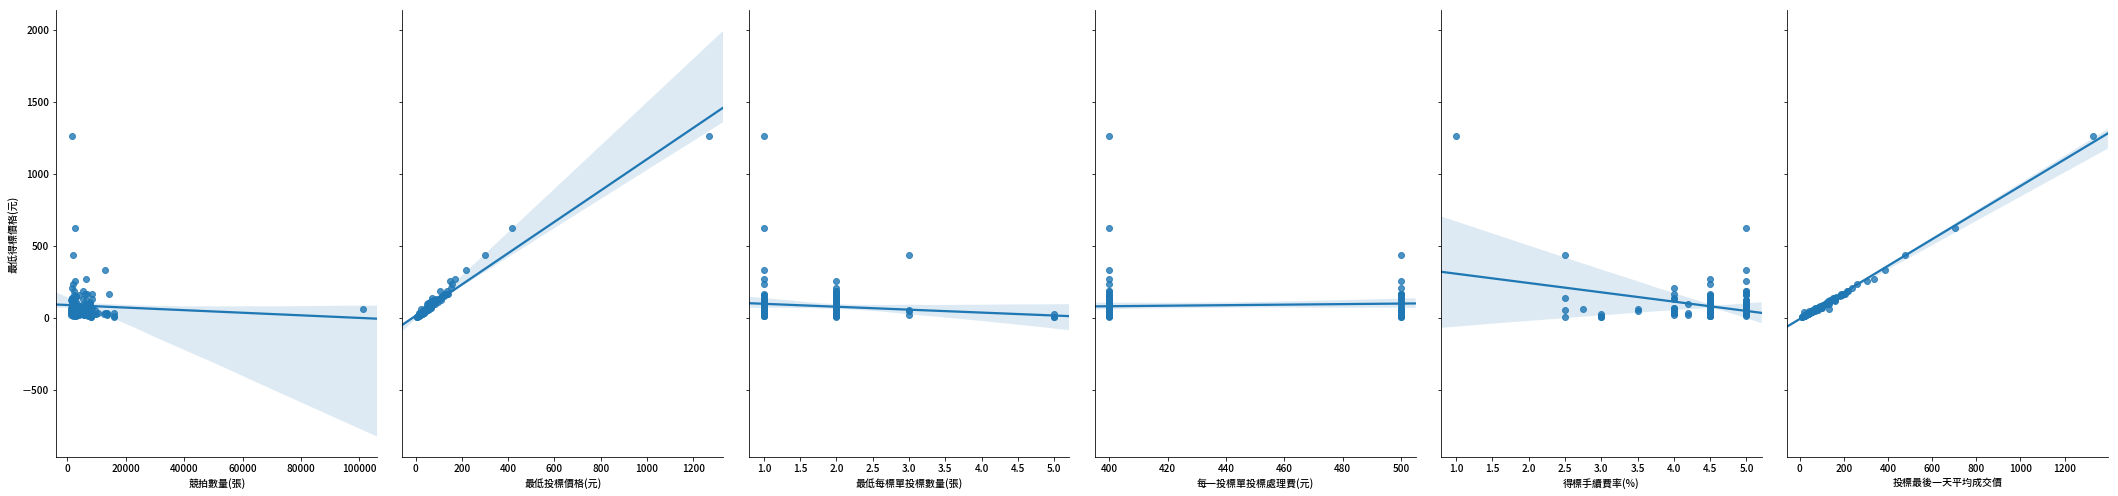

In [303]:
sn.pairplot(df_1, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

In [304]:
df_1['發行性質'].value_counts()

初上櫃        89
初上市        54
上櫃增資        1
第一上市初上市     1
Name: 發行性質, dtype: int64

In [305]:
index = df_1[df_1['發行性質']=='第一上市初上市'].index
df_1.drop(index, inplace = True)

In [306]:
dummies = pd.get_dummies(df_1['發行性質'])
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['發行性質'], axis = 1, inplace = True)
df_1.drop(['初上櫃'], axis = 1, inplace = True)   ## 將發行性質轉成類別變數 上市=1, 上櫃=0

In [307]:
dummies = pd.get_dummies(df_1['每一投標單投標處理費(元)'])
dummies.columns = ['處理費_400','處理費_500']
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['每一投標單投標處理費(元)', '處理費_500'], axis = 1, inplace = True)    ## 處理費轉為類別變數 處利費400=1, 500=0

In [308]:
dummies = pd.get_dummies(df_1['最低每標單投標數量(張)'])
dummies.columns = ['最低每標單投_1','最低每標單投_2','最低每標單投_3','最低每標單投_5']
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['最低每標單投標數量(張)', '最低每標單投_5'], axis = 1, inplace = True)
df_1.columns

Index(['開標日期', '證券名稱', '證券代號', '發行市場', '競拍數量(張)', '最低投標價格(元)', '得標手續費率(%)',
       '投標最後一天平均成交價', '最低得標價格(元)', '撥券日開盤價', '最低得標相對最低投標漲幅(%)',
       '最後一天平均成交相對最低投標漲幅(%)', '轉換後平均成交價', '轉換後最低得標價格(元)', '上櫃增資', '初上市',
       '處理費_400', '最低每標單投_1', '最低每標單投_2', '最低每標單投_3'],
      dtype='object')

In [309]:
df_1.shape

(144, 20)

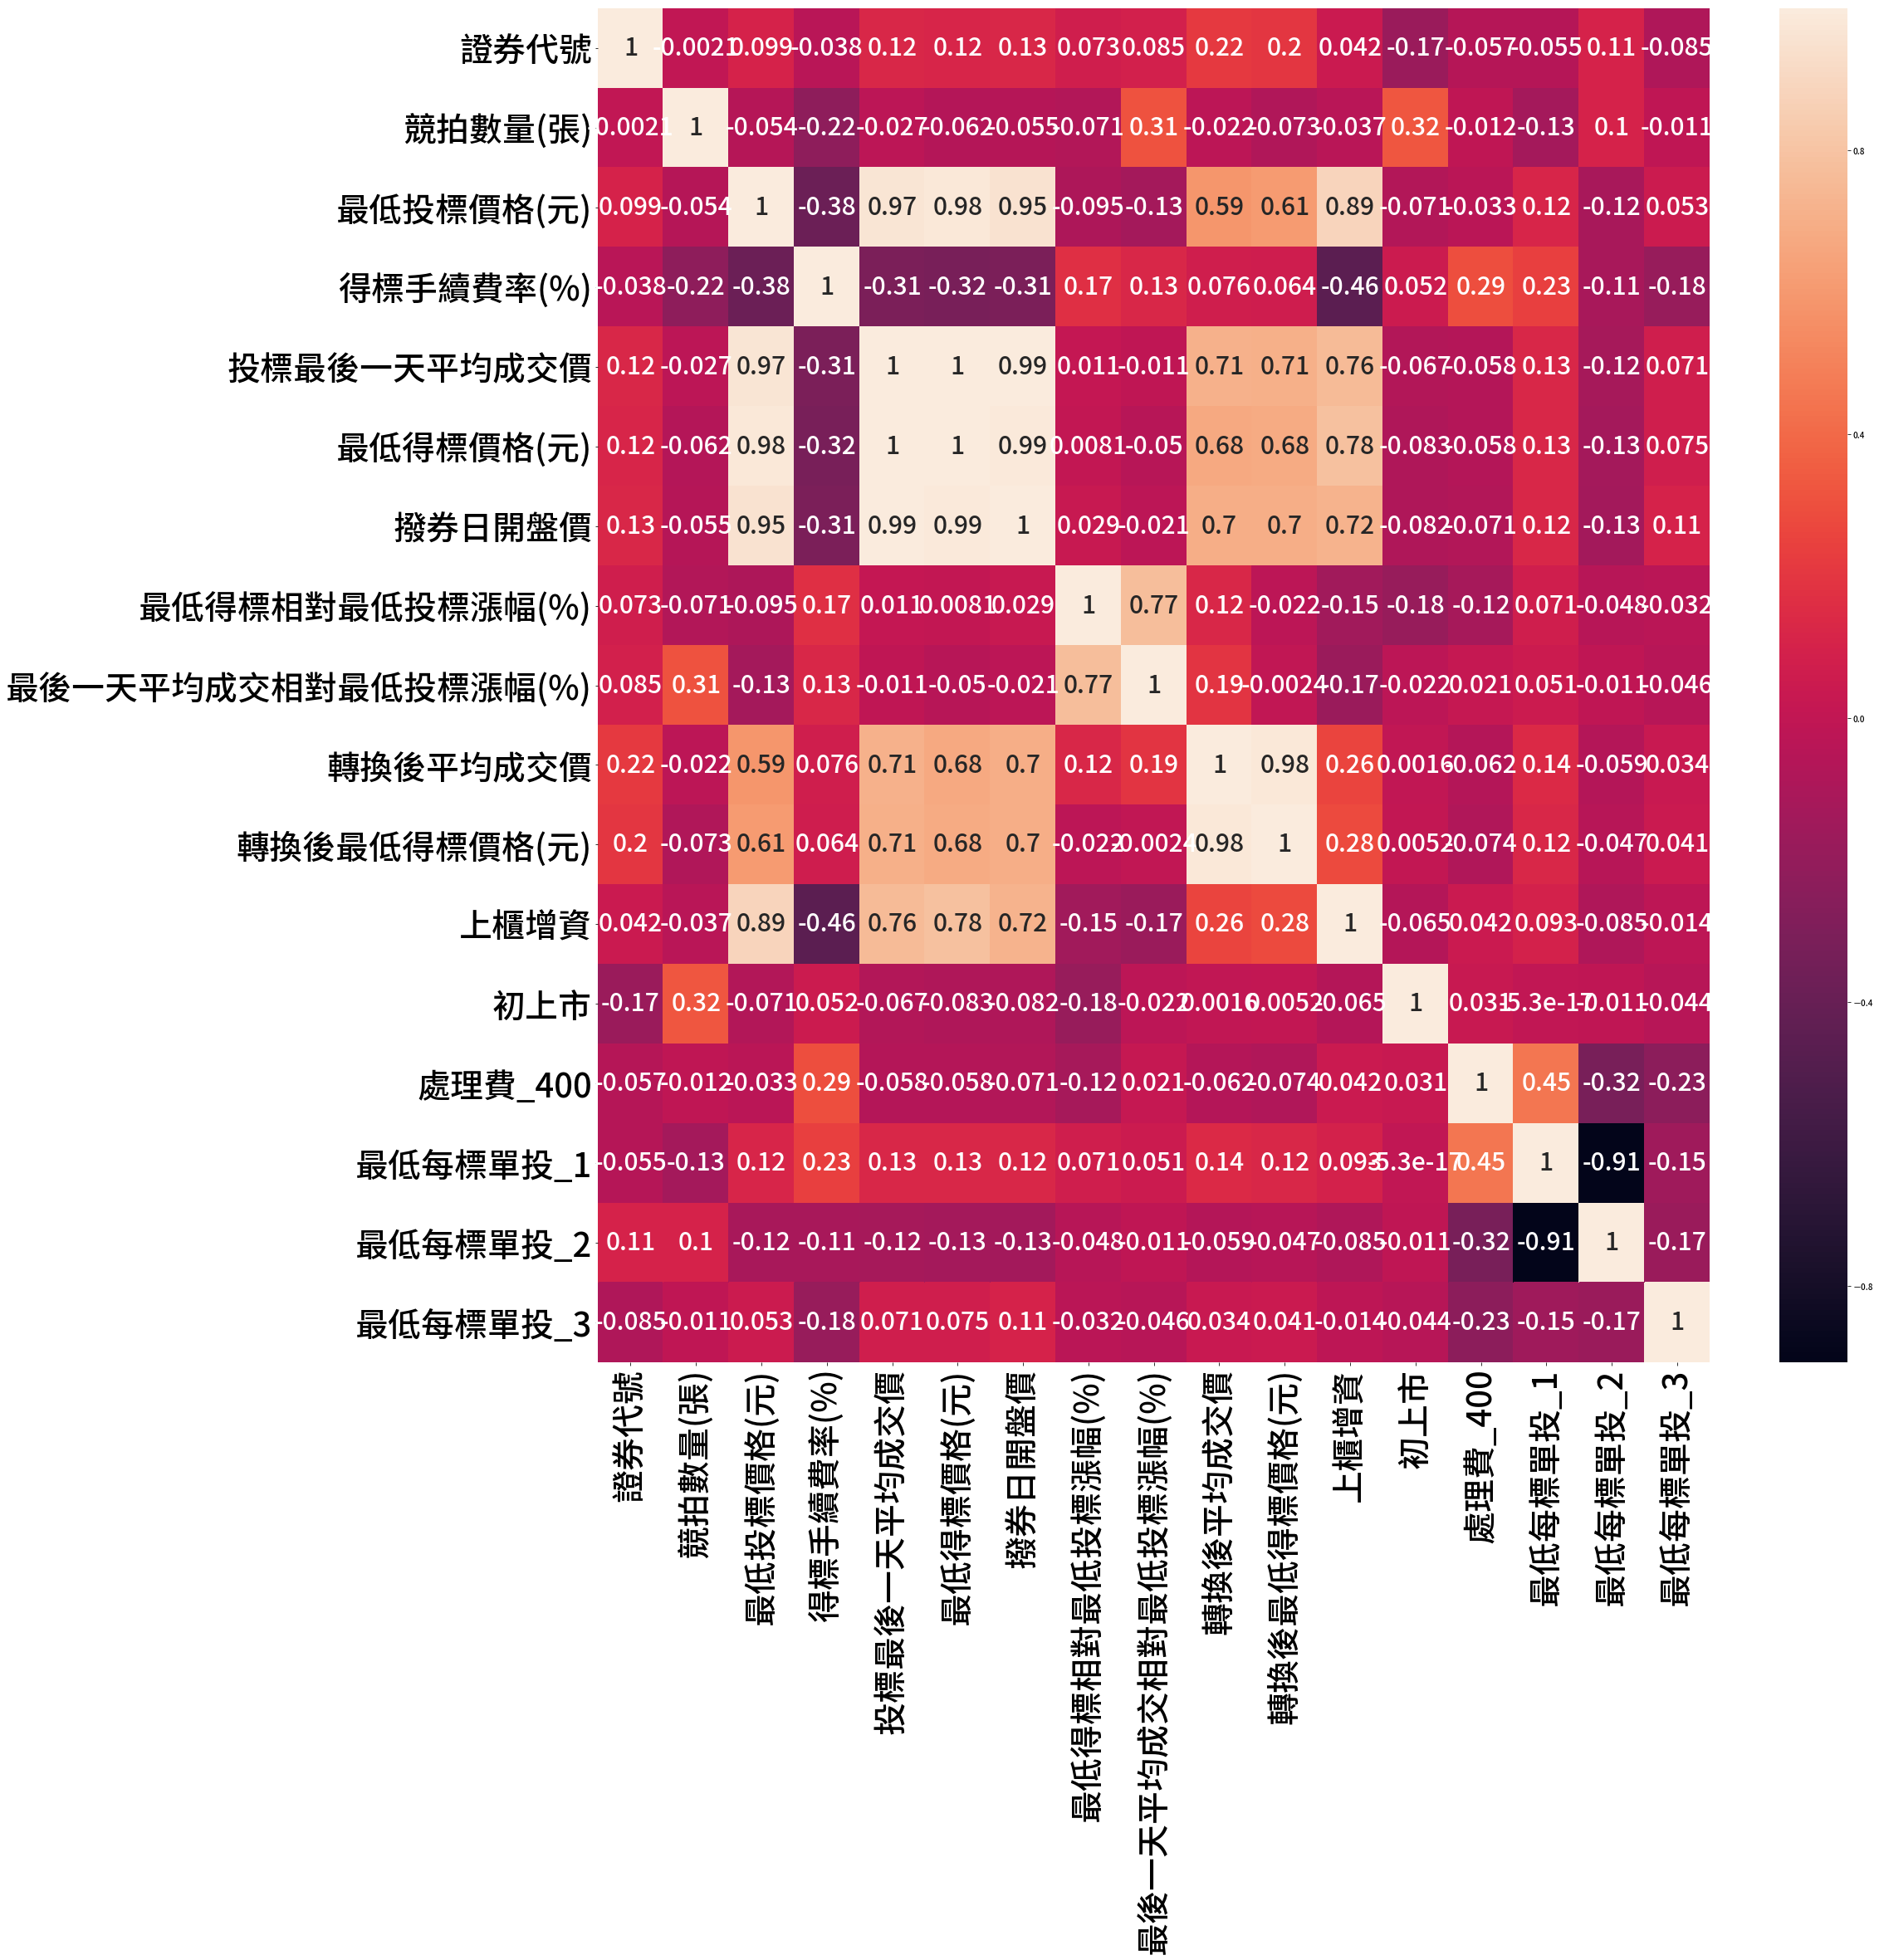

In [310]:
plt.figure(figsize=(30, 30))
corrMatrix = df_1.corr()

res = sn.heatmap(corrMatrix, annot=True, annot_kws={"size": 30})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 40, rotation = 90)

res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 40, rotation = 0)
plt.show()

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


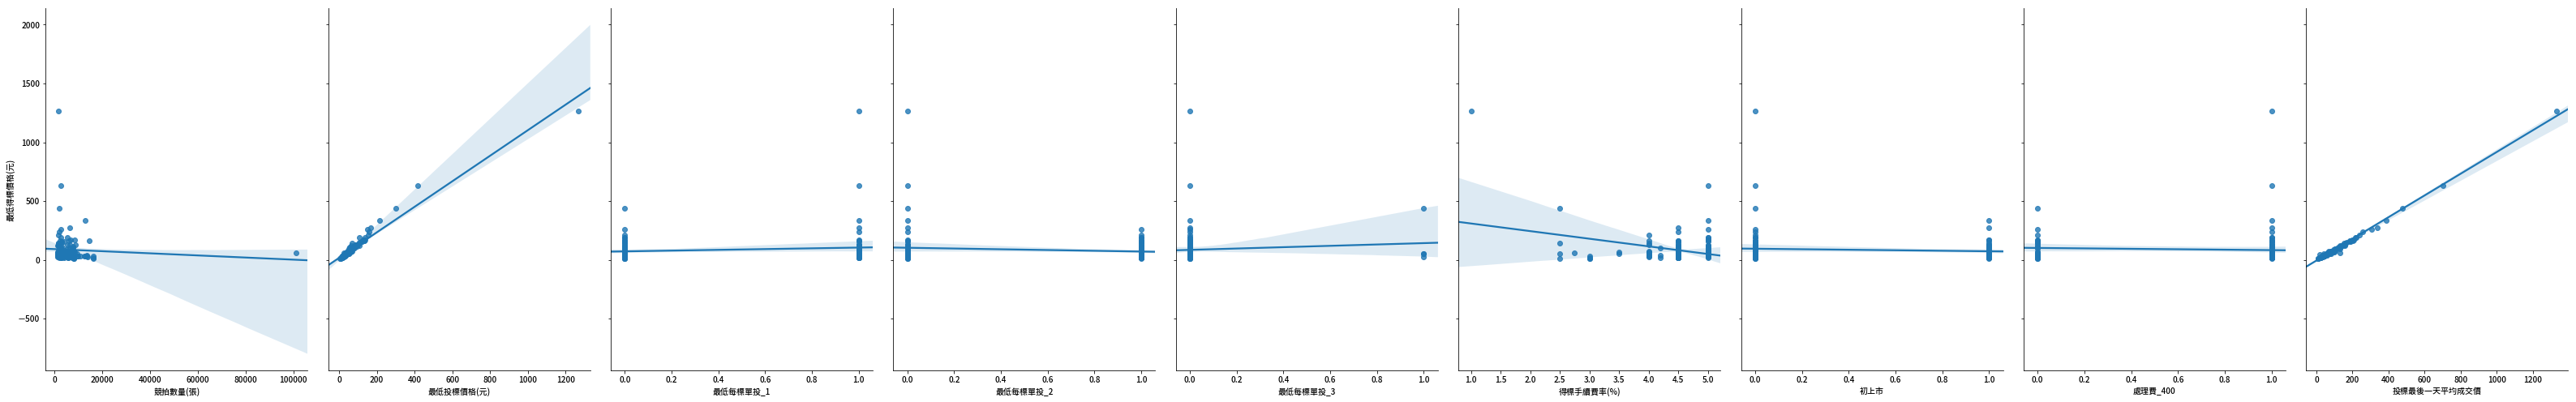

In [311]:
sn.pairplot(df_1, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

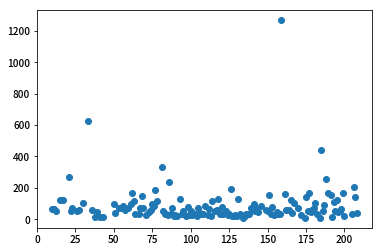

In [312]:
plt.scatter(df_1.index, df_1['最低得標價格(元)'])

In [313]:
df_1[df_1['最低得標價格(元)']> 600]

開標日期  證券名稱  證券代號  發行市場  競拍數量(張)  最低投標價格(元)  得標手續費率(%)  投標最後一天平均成交價  \
33   2020/5/25  昇佳電子  6732  櫃檯買賣     2546     415.00        5.0       702.06   
159  2017/9/18    精測  6510  櫃檯買賣     1530    1267.33        1.0      1330.00   

     最低得標價格(元)  撥券日開盤價  最低得標相對最低投標漲幅(%)  最後一天平均成交相對最低投標漲幅(%)  轉換後平均成交價  \
33      628.01   730.0        51.327711            69.171084  4.449636   
159    1267.33  1250.0         0.000000             4.945042  4.716744   

     轉換後最低得標價格(元)  上櫃增資  初上市  處理費_400  最低每標單投_1  最低每標單投_2  最低每標單投_3  
33       3.781766     0    0        1         1         0         0  
159      4.149314     1    0        1         1         0         0

In [314]:
## index = df_1[df_1['最低得標價格(元)']> 600].index
## df_1.drop(index, inplace = True)

## 切資料 將最近的30筆當作test 其他的拿去train

In [315]:
df_1['開標日期'] = pd.to_datetime(df_1['開標日期'])
df_1['開標日期']

10    2020-11-17
11    2020-11-10
12    2020-11-06
15    2020-10-16
17    2020-10-05
         ...    
200   2016-10-13
205   2016-12-05
206   2016-12-07
207   2016-12-14
208   2016-12-16
Name: 開標日期, Length: 144, dtype: datetime64[ns]

In [316]:
df_1 = df_1.sort_values(by = '開標日期', ascending = False)
df_1.reset_index(inplace = True, drop = True)
df_1.head()

開標日期  證券名稱  證券代號    發行市場  競拍數量(張)  最低投標價格(元)  得標手續費率(%)  投標最後一天平均成交價  \
0 2020-11-17  亞泰金屬  6727    櫃檯買賣     2005      48.00        5.0        68.97   
1 2020-11-10    八貫  1342  集中交易市場     4234      50.00        4.5        76.48   
2 2020-11-06  陞達科技  4945    櫃檯買賣     2244      34.86        5.0        40.32   
3 2020-10-16   意德士  7556    櫃檯買賣     1712      80.00        5.0       141.45   
4 2020-10-05    軒郁  6703    櫃檯買賣     2040      80.08        5.0       138.26   

   最低得標價格(元)  撥券日開盤價  最低得標相對最低投標漲幅(%)  最後一天平均成交相對最低投標漲幅(%)  轉換後平均成交價  \
0       62.4    66.2        30.000000            43.687500  3.275266   
1       63.6    63.0        27.200000            52.960000  3.335263   
2       49.9    52.8        43.144005            15.662651  2.950669   
3      124.0   115.0        55.000000            76.812500  3.676390   
4      123.0   125.0        53.596404            72.652348  3.664206   

   轉換後最低得標價格(元)  上櫃增資  初上市  處理費_400  最低每標單投_1  最低每標單投_2  最低每標單投_3  
0      2.841650     0    0        1         1         0         0  
1      2.862806     0    1        1         1         0         0  
2      2.670736     0    0        1         1         0         0  
3      3.096159     0    0        1         1         0         0  
4      3.096636     0    0        1         1         0         0

In [317]:
## 除了類別資料 都套上scaler
#sclaler = MinMaxScaler()
#num_vars = ['競拍數量(張)', '最低投標價格(元)', '投標最後一天平均成交價', '最低得標價格(元)', '得標手續費率(%)']
#df_1[num_vars] = sclaler.fit_transform(df_1[num_vars])
#df_1.head()

In [318]:
## 切前30筆當作test data 剩下當作 train data
test_df = df_1.iloc[:30]
train_df = df_1.iloc[30:]

In [319]:
X_train = train_df[['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','投標最後一天平均成交價']]
y_train = train_df['最低得標價格(元)']

In [320]:
X_test = test_df[['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','投標最後一天平均成交價']]
y_test = test_df['最低得標價格(元)']

In [321]:
y_train.shape, X_train.shape

((114,), (114, 9))

In [322]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

features    VIF
5    得標手續費率(%)  42.54
8  投標最後一天平均成交價  40.79
1    最低投標價格(元)  35.83
3     最低每標單投_2  21.98
2     最低每標單投_1  14.13
7      處理費_400   5.68
0      競拍數量(張)   4.19
6          初上市   2.44
4     最低每標單投_3   1.98

In [323]:
x_train1 = X_train[['投標最後一天平均成交價', '得標手續費率(%)', '最低每標單投_1','最低每標單投_2','最低每標單投_3', '處理費_400', '競拍數量(張)', '初上市']]
x_train1_c = sm.add_constant(x_train1)
lm1 = sm.OLS(y_train, x_train1_c).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4624.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          4.45e-130
Time:                        22:49:10   Log-Likelihood:                -381.88
No. Observations:                 114   AIC:                             781.8
Df Residuals:                     105   BIC:                             806.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          22.4514      6.349      3.536      0.001       9.862      35.041
投標最後一天平均成交價     0.9234      0.006    167.322      0.000       0.912       0.934
得標手續費率(%)      -6.3836      1.250     -5.105      0.000      -8.863      -3.904
最低每標單投_1       -2.5703      4.849     -0.530      0.597     -12.185       7.045
最低每標單投_2       -2.3357      4.602     -0.508      0.613     -11.460       6.789
最低每標單投_3       -2.2965      5.697     -0.403      0.688     -13.592       8.999
處理費_400         3.2840      1.779      1.846      0.068      -0.244       6.812
競拍數量(張)      -6.99e-05      0.000     -0.302      0.763      -0.001       0.000
初上市            -1.5009      1.708     -0.879      0.381      -4.887       1.885
==============================================================================
Omnibus:                       33.914   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.788
Skew:                           0.948   Prob(JB):                     2.17e-27
Kurtosis:                       7.717   Cond. No.                     8.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [324]:
vif1 = pd.DataFrame()
vif1['features'] = x_train1.columns
vif1["VIF"] = [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

features    VIF
1    得標手續費率(%)  36.93
3     最低每標單投_2  21.56
2     最低每標單投_1  13.98
5      處理費_400   5.21
6      競拍數量(張)   4.12
7          初上市   2.44
4     最低每標單投_3   1.98
0  投標最後一天平均成交價   1.72

In [325]:
x_train2 = X_train[['投標最後一天平均成交價', '得標手續費率(%)','最低每標單投_3', '初上市']]
x_train2_c = sm.add_constant(x_train2)
lm2 = sm.OLS(y_train, x_train2_c).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     9242.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          5.84e-137
Time:                        22:49:10   Log-Likelihood:                -384.04
No. Observations:                 114   AIC:                             778.1
Df Residuals:                     109   BIC:                             791.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          20.8952      5.353      3.903      0.000      10.286      31.505
投標最後一天平均成交價     0.9232      0.005    174.556      0.000       0.913       0.934
得標手續費率(%)      -6.0496      1.174     -5.154      0.000      -8.376      -3.723
最低每標單投_3       -1.4199      3.720     -0.382      0.703      -8.792       5.952
初上市            -1.6898      1.397     -1.209      0.229      -4.459       1.080
==============================================================================
Omnibus:                       22.532   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.480
Skew:                           0.613   Prob(JB):                     8.18e-16
Kurtosis:                       6.623   Cond. No.                     1.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [326]:
vif2 = pd.DataFrame()
vif2['features'] = x_train2.columns
vif2["VIF"] = [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

features   VIF
1    得標手續費率(%)  2.09
3          初上市  1.66
0  投標最後一天平均成交價  1.40
2     最低每標單投_3  1.04

In [327]:
x_train3 = X_train[['投標最後一天平均成交價', '得標手續費率(%)', '初上市']]
x_train3_c = sm.add_constant(x_train3)
lm3 = sm.OLS(y_train, x_train3_c).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.242e+04
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          5.18e-139
Time:                        22:49:11   Log-Likelihood:                -384.12
No. Observations:                 114   AIC:                             776.2
Df Residuals:                     110   BIC:                             787.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          20.5404      5.251      3.912      0.000      10.134      30.947
投標最後一天平均成交價     0.9231      0.005    175.248      0.000       0.913       0.934
得標手續費率(%)      -5.9802      1.155     -5.177      0.000      -8.269      -3.691
初上市            -1.6742      1.391     -1.203      0.231      -4.431       1.083
==============================================================================
Omnibus:                       23.225   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.226
Skew:                           0.635   Prob(JB):                     2.07e-16
Kurtosis:                       6.687   Cond. No.                     1.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [328]:
x_train4 = X_train[['投標最後一天平均成交價', '得標手續費率(%)']]
x_train4_c = sm.add_constant(x_train4)
lm4 = sm.OLS(y_train, x_train4_c).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.855e+04
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          6.90e-141
Time:                        22:49:11   Log-Likelihood:                -384.86
No. Observations:                 114   AIC:                             775.7
Df Residuals:                     111   BIC:                             783.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          20.5476      5.262      3.905      0.000      10.121      30.974
投標最後一天平均成交價     0.9234      0.005    175.053      0.000       0.913       0.934
得標手續費率(%)      -6.1358      1.150     -5.334      0.000      -8.415      -3.857
==============================================================================
Omnibus:                       23.446   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.615
Skew:                           0.627   Prob(JB):                     3.81e-17
Kurtosis:                       6.787   Cond. No.                     1.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [329]:
x_train5 = X_train[['投標最後一天平均成交價']]
x_train5_c = sm.add_constant(x_train5)
lm5 = sm.OLS(y_train, x_train5_c).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.978e+04
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.01e-137
Time:                        22:49:11   Log-Likelihood:                -397.87
No. Observations:                 114   AIC:                             799.7
Df Residuals:                     112   BIC:                             805.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.1767      0.917     -7.824      0.000      -8.994      -5.359
投標最後一天平均成交價     0.9344      0.005    172.563      0.000       0.924       0.945
==============================================================================
Omnibus:                       17.984   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.983
Skew:                           0.172   Prob(JB):                     2.60e-18
Kurtosis:                       7.115   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* lm2 Y ~ '投標最後一天平均成交價', '得標手續費率(%)', '初上市', '最低每標單投_3'
* lm3 Y ~ '投標最後一天平均成交價', '得標手續費率(%)', '初上市'
* lm4 Y ~ '投標最後一天平均成交價', '得標手續費率(%)'
* lm5 Y ~ '投標最後一天平均成交價'

In [330]:
def vif_df(X):
    vif_df = pd.DataFrame()
    vif_df['features'] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by = "VIF", ascending = False)
    return(vif_df)

In [331]:
model_list = [lm2, lm3, lm4, lm5]
aic = []
bic = []
mse = []
a_rsq = []

for model in model_list:
    aic.append(model.aic)
    bic.append(model.bic)
    mse.append(model.mse_resid)
    a_rsq.append(model.rsquared_adj)

select_df =  pd.DataFrame()
select_df['AIC'] = aic
select_df["BIC"] = bic
select_df['MSE'] = mse
select_df["A_RSQ"] = a_rsq
select_df.index = ['lm2', 'lm3', 'lm4', 'lm5']
select_df

AIC         BIC        MSE     A_RSQ
lm2  778.085718  791.766710  51.653994  0.996952
lm3  776.238026  787.182820  51.252842  0.996976
lm4  775.729106  783.937702  51.459798  0.996964
lm5  799.746720  805.219117  64.075168  0.996219

## 殘差分析
### error terms = y_actual - y_predicted

In [332]:
y_train_pred2 = lm2.predict(x_train2_c)
res2 = y_train - y_train_pred2
print('MSE for lm2_train: %f' %(sum([i**2 for i in res2])/ len(res2)))

y_train_pred3 = lm3.predict(x_train3_c)
res3 = y_train - y_train_pred3
print('MSE for lm3_train: %f' %(sum([i**2 for i in res3])/ len(res3)))

y_train_pred4 = lm4.predict(x_train4_c)
res4 = y_train - y_train_pred4
print('MSE for lm4_train: %f' %(sum([i**2 for i in res4])/ len(res4)))

y_train_pred5 = lm5.predict(x_train5_c)
res5 = y_train - y_train_pred5
print('MSE for lm5_train: %f' %(sum([i**2 for i in res5])/ len(res5)))


MSE for lm2_train: 49.388468
MSE for lm3_train: 49.454497
MSE for lm4_train: 50.105593
MSE for lm5_train: 62.951043


In [333]:

X_test2 = X_test[['投標最後一天平均成交價', '得標手續費率(%)','最低每標單投_3', '初上市']]
x_test_lm2 = sm.add_constant(X_test2)
y_test_pred2 = lm2.predict(x_test_lm2)
res2 = y_test - y_test_pred2
print('MSE for lm2_test: %f' %(sum([i**2 for i in res2])/ len(res2)))

X_test3 = X_test[['投標最後一天平均成交價', '得標手續費率(%)', '初上市']]
x_test_lm3 = sm.add_constant(X_test3)
y_test_pred3 = lm3.predict(x_test_lm3)
res3 = y_test - y_test_pred3
print('MSE for lm3_test: %f' %(sum([i**2 for i in res3])/ len(res3)))

X_test4 = X_test[['投標最後一天平均成交價', '得標手續費率(%)']]
x_test_lm4 = sm.add_constant(X_test4)
y_test_pred4 = lm4.predict(x_test_lm4)
res4 = y_test - y_test_pred4
print('MSE for lm4_test: %f' %(sum([i**2 for i in res4])/ len(res4)))

X_test5 = X_test[['投標最後一天平均成交價']]
x_test_lm5 = sm.add_constant(X_test5)
y_test_pred5 = lm5.predict(x_test_lm5)
res5 = y_test - y_test_pred5
print('MSE for lm5_test: %f' %(sum([i**2 for i in res5])/ len(res5)))

MSE for lm2_test: 227.543821
MSE for lm3_test: 226.892970
MSE for lm4_test: 237.735992
MSE for lm5_test: 208.781440


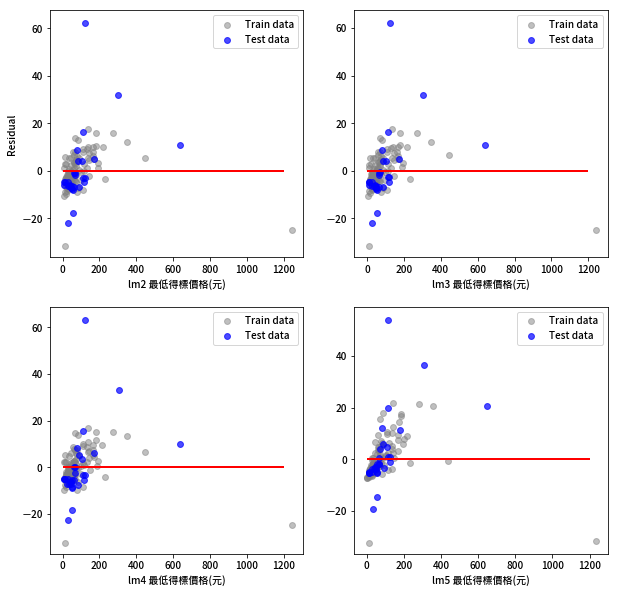

In [334]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.scatter(y_train_pred2, y_train_pred2 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred2, y_test_pred2 - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('lm2 最低得標價格(元)')
plt.ylabel('Residual')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 1200, lw = 2, color = 'red')

plt.subplot(2,2,2)
plt.scatter(y_train_pred3, y_train_pred3 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred3, y_test_pred3 - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('lm3 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 1200, lw = 2, color = 'red')

plt.subplot(2,2,3)
plt.scatter(y_train_pred4, y_train_pred4 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred4, y_test_pred4 - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('lm4 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 1200, lw = 2, color = 'red')

plt.subplot(2,2,4)
plt.scatter(y_train_pred5, y_train_pred5 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred5, y_test_pred5 - y_test,
             c = 'blue', marker = 'o', s = 35, alpha = 0.7,
             label = 'Test data')
plt.xlabel('lm5 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 1200, lw = 2, color = 'red')



## 用box cox使預測變數分布接近常態 再配模型看看

* 轉換 X(投標最後一天平均成交價)
* 轉換 Y(最低投標價格(元))

## 轉換 X(投標最後一天平均成交價) :

(array([11., 16., 25., 13., 16., 13.,  8.,  4.,  5.,  7.,  5.,  4.,  0.,
         4.,  3.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   8.92  ,   22.1308,   35.3416,   48.5524,   61.7632,   74.974 ,
          88.1848,  101.3956,  114.6064,  127.8172,  141.028 ,  154.2388,
         167.4496,  180.6604,  193.8712,  207.082 ,  220.2928,  233.5036,
         246.7144,  259.9252,  273.136 ,  286.3468,  299.5576,  312.7684,
         325.9792,  339.19  ,  352.4008,  365.6116,  378.8224,  392.0332,
         405.244 ,  418.4548,  431.6656,  444.8764,  458.0872,  

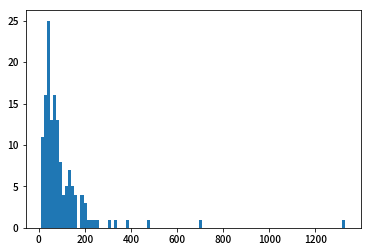

In [335]:
# 原本x的分布
plt.hist(df_1['投標最後一天平均成交價'], bins = 100)

In [336]:
lam_range = np.linspace(-2,5,100)  # default nums=50
llf = np.zeros(lam_range.shape, dtype=float)

# lambda estimate:
for i,lam in enumerate(lam_range):
    llf[i] = stats.boxcox_llf(lam, df_1['投標最後一天平均成交價'])		# 欲轉換值 必須>0

# find the max lgo-likelihood(llf) index and decide the lambda
lam_best = lam_range[llf.argmax()]
print('Suitable lam is: ',round(lam_best,2))
print('Max llf is: ', round(llf.max(),2))

Suitable lam is:  -0.16
Max llf is:  -577.7


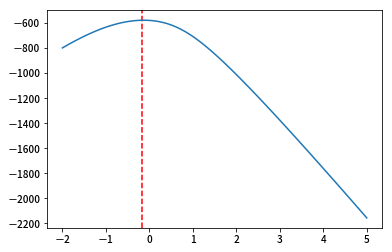

In [337]:
plt.figure()
plt.axvline(round(lam_best,2),ls="--",color="r")
plt.plot(lam_range,llf)
plt.show()

### 因為lambda接近0 使用log轉換

(array([ 1.,  2.,  0.,  0.,  0.,  0.,  2.,  3.,  2.,  3.,  3.,  3.,  3.,
         6., 16.,  6.,  2.,  3.,  8.,  8.,  9.,  8.,  9.,  3.,  6.,  2.,
         8.,  3.,  7.,  1.,  5.,  3.,  2.,  1.,  0.,  1.,  1.,  1.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.18829595, 2.28838871, 2.38848148, 2.48857424, 2.58866701,
        2.68875977, 2.78885254, 2.88894531, 2.98903807, 3.08913084,
        3.1892236 , 3.28931637, 3.38940913, 3.4895019 , 3.58959466,
        3.68968743, 3.78978019, 3.88987296, 3.98996573, 4.09005849,
        4.19015126, 4.29024402, 4.39033679, 4.49042955, 4.59052232,
        4.69061508, 4.79070785, 4.89080061, 4.99089338, 5.09098615,
        5.19107891, 5.29117168, 5.39126444, 5.49135721, 5.59144997,
        5.69154274, 5.7916355 , 5.89172827, 5.99182104, 6.0919138 ,
        6.19200657, 6.29209933, 6.3921921 , 6.49228486, 6.59237763,
        6.69247039, 6.79256316, 6.89265592, 6.99274869, 7.09284146,
        7.19293422]),
 <a list of 50

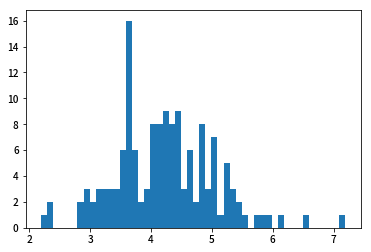

In [338]:
log_x = np.log(df_1['投標最後一天平均成交價'])
df_1['轉換後平均成交價'] = log_x
plt.hist(df_1['轉換後平均成交價'], bins = 50)

## 轉換Y(最低得標價格(元)) :

In [339]:
lam_range = np.linspace(-2,5,100)  # default nums=50
llf = np.zeros(lam_range.shape, dtype=float)

# lambda estimate:
for i,lam in enumerate(lam_range):
    llf[i] = stats.boxcox_llf(lam, df_1['最低得標價格(元)'])		# 欲轉換值 必須>0

# find the max lgo-likelihood(llf) index and decide the lambda
lam_best = lam_range[llf.argmax()]
print('Suitable lam is: ',round(lam_best,2))
print('Max llf is: ', round(llf.max(),2))

Suitable lam is:  -0.16
Max llf is:  -551.94


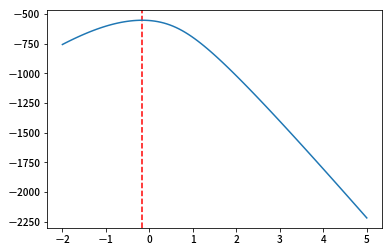

In [340]:
plt.figure()
plt.axvline(round(lam_best,2),ls="--",color="r")
plt.plot(lam_range,llf)
plt.show()

### 同上因為 lambda接近0 使用log轉換

(array([ 1.,  2.,  0.,  0.,  0.,  2.,  0.,  4.,  1.,  5.,  3.,  2.,  9.,
         4., 15.,  3.,  4.,  3., 11.,  9.,  9., 11.,  5.,  2.,  6.,  3.,
         6.,  4.,  3.,  6.,  1.,  2.,  1.,  1.,  2.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.08193842, 2.18319301, 2.28444759, 2.38570217, 2.48695676,
        2.58821134, 2.68946592, 2.79072051, 2.89197509, 2.99322967,
        3.09448426, 3.19573884, 3.29699343, 3.39824801, 3.49950259,
        3.60075718, 3.70201176, 3.80326634, 3.90452093, 4.00577551,
        4.10703009, 4.20828468, 4.30953926, 4.41079385, 4.51204843,
        4.61330301, 4.7145576 , 4.81581218, 4.91706676, 5.01832135,
        5.11957593, 5.22083051, 5.3220851 , 5.42333968, 5.52459427,
        5.62584885, 5.72710343, 5.82835802, 5.9296126 , 6.03086718,
        6.13212177, 6.23337635, 6.33463094, 6.43588552, 6.5371401 ,
        6.63839469, 6.73964927, 6.84090385, 6.94215844, 7.04341302,
        7.1446676 ]),
 <a list of 50

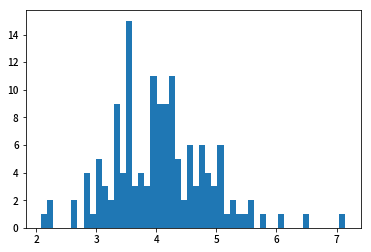

In [341]:
log_y = np.log(df_1['最低得標價格(元)'])
df_1['轉換後最低得標價格(元)'] = log_y
plt.hist(df_1['轉換後最低得標價格(元)'], bins = 50)

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


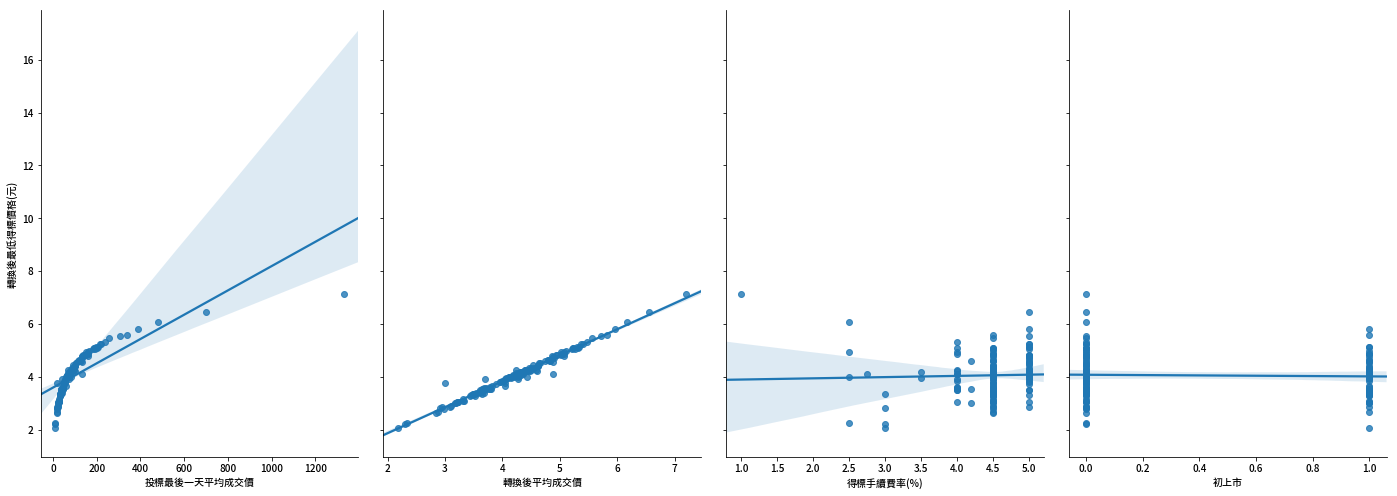

In [342]:
sn.pairplot(df_1, x_vars=['投標最後一天平均成交價','轉換後平均成交價','得標手續費率(%)', '初上市'], y_vars='轉換後最低得標價格(元)', size=7, aspect=0.7, kind='reg')

In [343]:
test_df = df_1.iloc[:30]
train_df = df_1.iloc[30:]

logX_train = train_df[['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','轉換後平均成交價']]
logy_train = train_df['轉換後最低得標價格(元)']

logX_test = test_df[['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','轉換後平均成交價']]
logy_test = test_df['轉換後最低得標價格(元)']

logy_train.shape, logX_train.shape

((114,), (114, 9))

In [344]:
vif = pd.DataFrame()
vif['features'] = logX_train.columns
vif["VIF"] = [variance_inflation_factor(logX_train.values, i) for i in range(logX_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

features    VIF
5  得標手續費率(%)  67.63
8   轉換後平均成交價  61.89
3   最低每標單投_2  25.52
2   最低每標單投_1  16.44
7    處理費_400   5.73
0    競拍數量(張)   4.20
1  最低投標價格(元)   3.53
6        初上市   2.47
4   最低每標單投_3   2.27

In [345]:
logx_train1 = logX_train[['轉換後平均成交價', '得標手續費率(%)', '最低每標單投_1','最低每標單投_2','最低每標單投_3', '處理費_400', '競拍數量(張)', '初上市']]
logx_train1_c = sm.add_constant(logx_train1)
loglm1 = sm.OLS(logy_train, logx_train1_c).fit()
loglm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           轉換後最低得標價格(元)   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     838.8
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           1.85e-91
Time:                        22:49:19   Log-Likelihood:                 98.758
No. Observations:                 114   AIC:                            -179.5
Df Residuals:                     105   BIC:                            -154.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0727      0.099      0.734      0.464      -0.124       0.269
轉換後平均成交價       0.9810      0.013     73.162      0.000       0.954       1.008
得標手續費率(%)     -0.0185      0.017     -1.102      0.273      -0.052       0.015
最低每標單投_1      -0.0009      0.074     -0.012      0.991      -0.147       0.145
最低每標單投_2      -0.0085      0.070     -0.122      0.903      -0.147       0.130
最低每標單投_3      -0.0378      0.086     -0.442      0.659      -0.208       0.132
處理費_400       -0.0682      0.027     -2.528      0.013      -0.122      -0.015
競拍數量(張)     -2.04e-06   3.47e-06     -0.587      0.558   -8.93e-06    4.85e-06
初上市           -0.0267      0.025     -1.051      0.296      -0.077       0.024
==============================================================================
Omnibus:                      160.552   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8774.854
Skew:                           5.051   Prob(JB):                         0.00
Kurtosis:                      44.777   Cond. No.                     8.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [346]:
logx_train2 = logX_train[['轉換後平均成交價', '得標手續費率(%)','最低每標單投_3', '初上市']]
logx_train2_c = sm.add_constant(logx_train2)
loglm2 = sm.OLS(logy_train, logx_train2_c).fit()
loglm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           轉換後最低得標價格(元)   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1627.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           3.53e-96
Time:                        22:49:19   Log-Likelihood:                 94.953
No. Observations:                 114   AIC:                            -179.9
Df Residuals:                     109   BIC:                            -166.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0267      0.087      0.307      0.760      -0.146       0.199
轉換後平均成交價       0.9868      0.012     80.440      0.000       0.963       1.011
得標手續費率(%)     -0.0284      0.016     -1.746      0.084      -0.061       0.004
最低每標單投_3      -0.0054      0.056     -0.097      0.923      -0.116       0.105
初上市           -0.0353      0.021     -1.686      0.095      -0.077       0.006
==============================================================================
Omnibus:                      171.453   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11647.417
Skew:                           5.578   Prob(JB):                         0.00
Kurtosis:                      51.245   Cond. No.                         54.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [347]:
logx_train3 = logX_train[['轉換後平均成交價', '得標手續費率(%)', '初上市']]
logx_train3_c = sm.add_constant(logx_train3)
loglm3 = sm.OLS(logy_train, logx_train3_c).fit()
loglm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           轉換後最低得標價格(元)   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2189.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           6.97e-98
Time:                        22:49:19   Log-Likelihood:                 94.948
No. Observations:                 114   AIC:                            -181.9
Df Residuals:                     110   BIC:                            -171.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0256      0.086      0.298      0.766      -0.145       0.196
轉換後平均成交價       0.9868      0.012     80.924      0.000       0.963       1.011
得標手續費率(%)     -0.0281      0.016     -1.764      0.081      -0.060       0.003
初上市           -0.0352      0.021     -1.692      0.094      -0.076       0.006
==============================================================================
Omnibus:                      171.479   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11652.442
Skew:                           5.580   Prob(JB):                         0.00
Kurtosis:                      51.256   Cond. No.                         53.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [348]:
logx_train4 = logX_train[['轉換後平均成交價', '得標手續費率(%)']]
logx_train4_c = sm.add_constant(logx_train4)
loglm4 = sm.OLS(logy_train, logx_train4_c).fit()
loglm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           轉換後最低得標價格(元)   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     3228.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           4.45e-99
Time:                        22:49:19   Log-Likelihood:                 93.484
No. Observations:                 114   AIC:                            -181.0
Df Residuals:                     111   BIC:                            -172.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0254      0.087      0.293      0.770      -0.146       0.197
轉換後平均成交價       0.9874      0.012     80.341      0.000       0.963       1.012
得標手續費率(%)     -0.0318      0.016     -1.997      0.048      -0.063      -0.000
==============================================================================
Omnibus:                      171.798   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12021.278
Skew:                           5.581   Prob(JB):                         0.00
Kurtosis:                      52.053   Cond. No.                         53.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [349]:
logx_train5 = logX_train[['轉換後平均成交價']]
logx_train5_c = sm.add_constant(logx_train5)
loglm5 = sm.OLS(logy_train, logx_train5_c).fit()
loglm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           轉換後最低得標價格(元)   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     6285.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          3.17e-100
Time:                        22:49:19   Log-Likelihood:                 91.472
No. Observations:                 114   AIC:                            -178.9
Df Residuals:                     112   BIC:                            -173.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1121      0.053     -2.111      0.037      -0.217      -0.007
轉換後平均成交價       0.9872      0.012     79.278      0.000       0.963       1.012
==============================================================================
Omnibus:                      163.809   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9949.128
Skew:                           5.180   Prob(JB):                         0.00
Kurtosis:                      47.578   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [350]:
logy_train_pred3 = loglm3.predict(logx_train3_c)
logy_train_pred3_og = np.exp(logy_train_pred3)
logy_train_og = np.exp(logy_train)
res_train_3 = logy_train_og - logy_train_pred3_og
print('MSE for loglm3_train: %f' %(sum([i**2 for i in res_train_3])/ len(res_train_3)))

logy_train_pred4 = loglm4.predict(logx_train4_c)
logy_train_pred4_og = np.exp(logy_train_pred4)
res_train_4 = logy_train_og - logy_train_pred4_og
print('MSE for loglm4_train: %f' %(sum([i**2 for i in res_train_4])/ len(res_train_4)))

logy_train_pred5 = loglm5.predict(logx_train5_c)
logy_train_pred5_og = np.exp(logy_train_pred5)
res_train_5 = logy_train_og - logy_train_pred5_og
print('MSE for loglm5_train: %f' %(sum([i**2 for i in res_train_5])/ len(res_train_5)))


MSE for loglm3_train: 67.563271
MSE for loglm4_train: 67.568387
MSE for loglm5_train: 340.526721


In [351]:
logX_test3 = logX_test[['轉換後平均成交價', '得標手續費率(%)','初上市']]
logx_test_lm3 = sm.add_constant(logX_test3)
logy_test_pred3 = loglm3.predict(logx_test_lm3)
logy_test_pred3_og = np.exp(logy_test_pred3)
logy_test_og = np.exp(logy_test)
res_test_3 = logy_test_og - logy_test_pred3_og
print('MSE for loglm3_test: %f' %(sum([i**2 for i in res_test_3])/ len(res_test_3)))

logX_test4 = logX_test[['轉換後平均成交價', '得標手續費率(%)']]
logx_test_lm4 = sm.add_constant(logX_test4)
logy_test_pred4 = loglm4.predict(logx_test_lm4)
logy_test_pred4_og = np.exp(logy_test_pred4)
res_test_4 = logy_test_og - logy_test_pred4_og
print('MSE for loglm4_test: %f' %(sum([i**2 for i in res_test_4])/ len(res_test_4)))

logX_test5 = logX_test[['轉換後平均成交價']]
logx_test_lm5 = sm.add_constant(logX_test5)
logy_test_pred5 = loglm5.predict(logx_test_lm5)
logy_test_pred5_og = np.exp(logy_test_pred5)
res_test_5 = logy_test_og - logy_test_pred5_og
print('MSE for loglm5_test: %f' %(sum([i**2 for i in res_test_5])/ len(res_test_5)))

MSE for loglm3_test: 220.934273
MSE for loglm4_test: 267.636818
MSE for loglm5_test: 199.922876


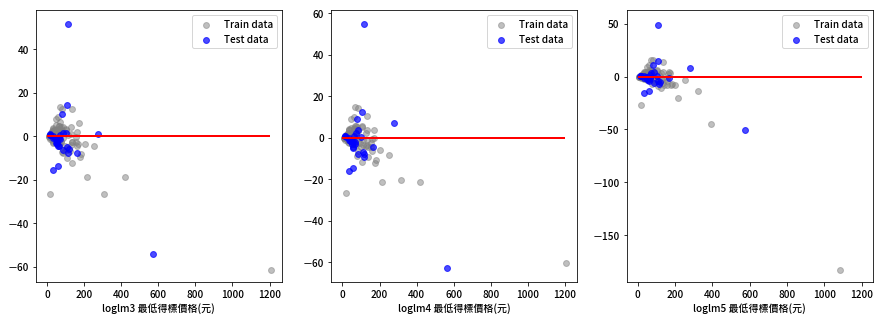

In [352]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.scatter(logy_train_pred3_og, logy_train_pred3_og - logy_train_og,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(logy_test_pred3_og, logy_test_pred3_og - logy_test_og,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('loglm3 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 1200, lw = 2, color = 'red')

plt.subplot(1,3,2)
plt.scatter(logy_train_pred4_og, logy_train_pred4_og - logy_train_og,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(logy_test_pred4_og, logy_test_pred4_og - logy_test_og,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('loglm4 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 1200, lw = 2, color = 'red')

plt.subplot(1,3,3)
plt.scatter(logy_train_pred5_og, logy_train_pred5_og - logy_train_og,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(logy_test_pred5_og, logy_test_pred5_og - logy_test_og,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('loglm5 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 1200, lw = 2, color = 'red')

## 策略1: 用預測價格投1張 然後開盤賣

In [353]:

def success_n_profit(df_stock, pred):
    df_output = pd.DataFrame()
    df_output['最低投標價格(元)'] = df_stock['最低投標價格(元)']
    df_output['最低得標價格(元)'] = df_stock['最低得標價格(元)']
    df_output['投標價'] = pred
    df_output['撥券日開盤價'] = df_stock['撥券日開盤價']
    df_output['得標'] = 0
    df_output['得標'] = np.where(df_output['投標價'] >= df_output['最低得標價格(元)'], 1, 0)
    df_output['獲利'] = np.where(df_output['得標'] == 1, (df_output['撥券日開盤價']*1000 - (500 + df_output['投標價']*1.05*1000)), -500)
    df_output['有賺錢'] = np.where(df_output['獲利'] > 0 , 1, 0)
    df_output['累積損益'] = df_output['獲利'].cumsum()

    return df_output

In [354]:
## max_profit為用最低得標價格當投標價格
max_profit = success_n_profit(test_df, test_df['最低得標價格(元)'])
average_wins = sum(max_profit['獲利'][max_profit['獲利'] >0]) / sum(max_profit['有賺錢'])
average_loss = sum(max_profit['獲利'][max_profit['獲利'] <0]) / sum(max_profit['有賺錢'] == 0)
print('每次都用最低得標價格得標：')
print('交易次數：%i' %(len(max_profit['獲利'])))
print('勝率：%f' %(sum(max_profit['有賺錢'])/ len(max_profit['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(max_profit['獲利'])))

每次都用最低得標價格得標：
交易次數：30
勝率：0.666667
賺賠比：4.579174
獲利：248539


In [355]:
lm2_outcome = success_n_profit(test_df, y_test_pred2)
average_wins = sum(lm2_outcome['獲利'][lm2_outcome['獲利'] >0]) / sum(lm2_outcome['有賺錢'])
average_loss = sum(lm2_outcome['獲利'][lm2_outcome['獲利'] <0]) / sum(lm2_outcome['有賺錢'] == 0)
print('lm2:')
print('交易次數：%i' %(len(lm2_outcome['獲利'])))
print('勝率：%f' %(sum(lm2_outcome['有賺錢'])/ len(lm2_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm2_outcome['獲利'])))


lm2:
交易次數：30
勝率：0.166667
賺賠比：9.001628
獲利：63527


In [356]:
lm3_outcome = success_n_profit(test_df, y_test_pred3)
average_wins = sum(lm3_outcome['獲利'][lm3_outcome['獲利'] >0]) / sum(lm3_outcome['有賺錢'])
average_loss = sum(lm3_outcome['獲利'][lm3_outcome['獲利'] <0]) / sum(lm3_outcome['有賺錢'] == 0)
print('lm3:')
print('交易次數：%i' %(len(lm3_outcome['獲利'])))
print('勝率：%f' %(sum(lm3_outcome['有賺錢'])/ len(lm3_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm3_outcome['獲利'])))

lm3:
交易次數：30
勝率：0.166667
賺賠比：9.031770
獲利：63849


In [357]:
lm4_outcome = success_n_profit(test_df, y_test_pred4)
average_wins = sum(lm4_outcome['獲利'][lm4_outcome['獲利'] >0]) / sum(lm4_outcome['有賺錢'])
average_loss = sum(lm4_outcome['獲利'][lm4_outcome['獲利'] <0]) / sum(lm4_outcome['有賺錢'] == 0)
print('lm4:')
print('交易次數：%i' %(len(lm4_outcome['獲利'])))
print('勝率：%f' %(sum(lm4_outcome['有賺錢'])/ len(lm4_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm4_outcome['獲利'])))

lm4:
交易次數：30
勝率：0.166667
賺賠比：8.703211
獲利：61646


In [358]:
lm5_outcome = success_n_profit(test_df, y_test_pred5)
average_wins = sum(lm5_outcome['獲利'][lm5_outcome['獲利'] >0]) / sum(lm5_outcome['有賺錢'])
average_loss = sum(lm5_outcome['獲利'][lm5_outcome['獲利'] <0]) / sum(lm5_outcome['有賺錢'] == 0)
print('lm5:')
print('交易次數：%i' %(len(lm5_outcome['獲利'])))
print('勝率：%f' %(sum(lm5_outcome['有賺錢'])/ len(lm5_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm5_outcome['獲利'])))

lm5:
交易次數：30
勝率：0.166667
賺賠比：5.738171
獲利：15921


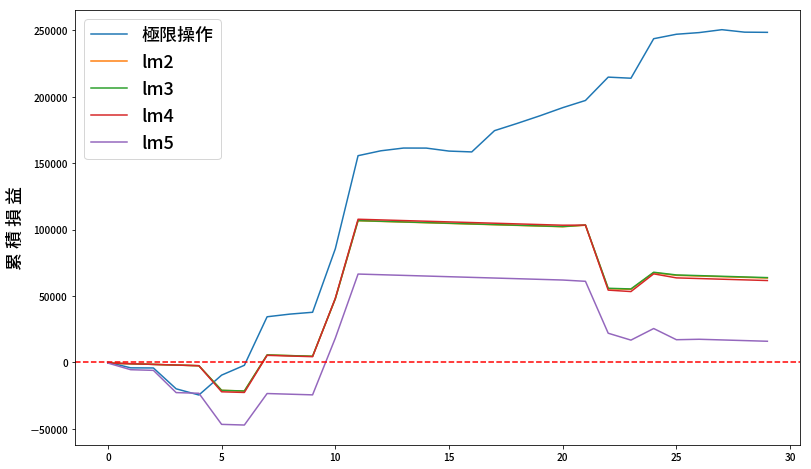

In [359]:
plt.figure(figsize = (13, 8))
plt.plot(max_profit['累積損益'], label = '極限操作')
plt.plot(lm2_outcome['累積損益'], label = 'lm2')
plt.plot(lm3_outcome['累積損益'], label = 'lm3')
plt.plot(lm4_outcome['累積損益'], label = 'lm4')
plt.plot(lm5_outcome['累積損益'], label = 'lm5')

plt.axhline(0, color = 'r', linestyle = '--')
plt.ylabel('累 積 損 益', fontsize = 18)
plt.legend(fontsize = 18)

## 策略2: 每次投注固定總金額(不超過本金為原則)

In [389]:
def success_n_profit2(df_stock, pred, principle):
    df_output = pd.DataFrame()
    df_output['最低投標價格(元)'] = df_stock['最低投標價格(元)']
    df_output['最低得標價格(元)'] = df_stock['最低得標價格(元)']
    df_output['投標價'] = pred
    df_output['撥券日開盤價'] = df_stock['撥券日開盤價']
    df_output['得標'] = 0
    df_output['得標'] = np.where(df_output['投標價'] >= df_output['最低得標價格(元)'], 1, 0)

    df_output['投標張數'] = principle // (df_output['投標價']*1000) 
    df_output['獲利'] = np.where(df_output['得標'] == 1, df_output['投標張數']* (df_output['撥券日開盤價']*1000 - (500 + df_output['投標價']*1.05*1000)), -500)
    df_output['有賺錢'] = np.where(df_output['獲利'] > 0 , 1, 0)
    df_output['累積損益'] = df_output['獲利'].cumsum()

    return df_output

In [390]:
max_profit2 = success_n_profit2(test_df, test_df['最低得標價格(元)'], 2500000)
average_wins = sum(max_profit2['獲利'][max_profit2['獲利'] >0]) / sum(max_profit2['有賺錢'])
average_loss = sum(max_profit2['獲利'][max_profit2['獲利'] <0]) / sum(max_profit2['有賺錢'] == 0)
print('每次都用最低得標價格得標：')
print('交易次數：%i' %(len(max_profit2['獲利'])))
print('勝率：%f' %(sum(max_profit2['有賺錢'])/ len(max_profit2['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(max_profit2['獲利'])))

每次都用最低得標價格得標：
交易次數：30
勝率：0.666667
賺賠比：2.725985
獲利：5563896


In [400]:
lm2_outcome2 = success_n_profit2(test_df, y_test_pred2, 2500000)
average_wins = sum(lm2_outcome2['獲利'][lm2_outcome2['獲利'] >0]) / sum(lm2_outcome2['有賺錢'])
average_loss = sum(lm2_outcome2['獲利'][lm2_outcome2['獲利'] <0]) / sum(lm2_outcome2['有賺錢'] == 0)
print('lm2: Y ~ 投標最後一天平均成交價 +得標手續費率(%) +初上市 +最低每標單投_3')
print('交易次數：%i' %(len(lm2_outcome2['獲利'])))
print('勝率：%f' %(sum(lm2_outcome2['有賺錢'])/ len(lm2_outcome2['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm2_outcome2['獲利'])))

lm2: Y ~ 投標最後一天平均成交價 +得標手續費率(%) +初上市 +最低每標單投_3
交易次數：30
勝率：0.166667
賺賠比：10.152706
獲利：1178493


In [401]:
lm3_outcome2 = success_n_profit2(test_df, y_test_pred3, 2500000)
average_wins = sum(lm3_outcome2['獲利'][lm3_outcome2['獲利'] >0]) / sum(lm3_outcome2['有賺錢'])
average_loss = sum(lm3_outcome2['獲利'][lm3_outcome2['獲利'] <0]) / sum(lm3_outcome2['有賺錢'] == 0)
print('lm3: Y ~ 投標最後一天平均成交價 +得標手續費率(%) +初上市 ')
print('交易次數：%i' %(len(lm3_outcome2['獲利'])))
print('勝率：%f' %(sum(lm3_outcome2['有賺錢'])/ len(lm3_outcome2['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm3_outcome2['獲利'])))

lm3: Y ~ 投標最後一天平均成交價 +得標手續費率(%) +初上市 
交易次數：30
勝率：0.166667
賺賠比：10.195081
獲利：1184606


In [402]:
lm4_outcome2 = success_n_profit2(test_df, y_test_pred4, 2500000)
average_wins = sum(lm4_outcome2['獲利'][lm4_outcome2['獲利'] >0]) / sum(lm4_outcome2['有賺錢'])
average_loss = sum(lm4_outcome2['獲利'][lm4_outcome2['獲利'] <0]) / sum(lm4_outcome2['有賺錢'] == 0)
print('lm4: Y ~ 投標最後一天平均成交價 +得標手續費率(%) ')
print('交易次數：%i' %(len(lm4_outcome2['獲利'])))
print('勝率：%f' %(sum(lm4_outcome2['有賺錢'])/ len(lm4_outcome2['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm4_outcome2['獲利'])))

lm4: Y ~ 投標最後一天平均成交價 +得標手續費率(%) 
交易次數：30
勝率：0.166667
賺賠比：9.575994
獲利：1124650


In [403]:
lm5_outcome2 = success_n_profit2(test_df, y_test_pred5, 2500000)
average_wins = sum(lm5_outcome2['獲利'][lm5_outcome2['獲利'] >0]) / sum(lm5_outcome2['有賺錢'])
average_loss = sum(lm5_outcome2['獲利'][lm5_outcome2['獲利'] <0]) / sum(lm5_outcome2['有賺錢'] == 0)
print('lm5: Y ~ 投標最後一天平均成交價 ')
print('交易次數：%i' %(len(lm5_outcome2['獲利'])))
print('勝率：%f' %(sum(lm5_outcome2['有賺錢'])/ len(lm5_outcome2['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm5_outcome2['獲利'])))

lm5: Y ~ 投標最後一天平均成交價 
交易次數：30
勝率：0.166667
賺賠比：5.381552
獲利：142221


In [404]:
loglm3_outcome2 = success_n_profit2(test_df, logy_test_pred3_og, 2500000)
average_wins = sum(loglm3_outcome2['獲利'][loglm3_outcome2['獲利'] >0]) / sum(loglm3_outcome2['有賺錢'])
average_loss = sum(loglm3_outcome2['獲利'][loglm3_outcome2['獲利'] <0]) / sum(loglm3_outcome2['有賺錢'] == 0)
print('loglm3: logY ~ log(投標最後一天平均成交價) +得標手續費率(%) +初上市')
print('交易次數：%i' %(len(loglm3_outcome2['獲利'])))
print('勝率：%f' %(sum(loglm3_outcome2['有賺錢'])/ len(loglm3_outcome2['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(loglm3_outcome2['獲利'])))

loglm3: logY ~ log(投標最後一天平均成交價) +得標手續費率(%) +初上市
交易次數：30
勝率：0.200000
賺賠比：6.142216
獲利：941442


In [405]:
loglm4_outcome2 = success_n_profit2(test_df, logy_test_pred4_og, 2500000)
average_wins = sum(loglm4_outcome2['獲利'][loglm4_outcome2['獲利'] >0]) / sum(loglm4_outcome2['有賺錢'])
average_loss = sum(loglm4_outcome2['獲利'][loglm4_outcome2['獲利'] <0]) / sum(loglm4_outcome2['有賺錢'] == 0)
print('loglm4: logY ~ log(投標最後一天平均成交價) +得標手續費率(%) ')
print('交易次數：%i' %(len(loglm4_outcome2['獲利'])))
print('勝率：%f' %(sum(loglm4_outcome2['有賺錢'])/ len(loglm4_outcome2['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(loglm4_outcome2['獲利'])))

loglm4: logY ~ log(投標最後一天平均成交價) +得標手續費率(%) 
交易次數：30
勝率：0.200000
賺賠比：5.909125
獲利：866230


In [406]:
loglm5_outcome2 = success_n_profit2(test_df, logy_test_pred5_og, 2500000)
average_wins = sum(loglm5_outcome2['獲利'][loglm5_outcome2['獲利'] >0]) / sum(loglm5_outcome2['有賺錢'])
average_loss = sum(loglm5_outcome2['獲利'][loglm5_outcome2['獲利'] <0]) / sum(loglm5_outcome2['有賺錢'] == 0)
print('loglm5: logY ~ log(投標最後一天平均成交價) ')
print('交易次數：%i' %(len(loglm5_outcome2['獲利'])))
print('勝率：%f' %(sum(loglm5_outcome2['有賺錢'])/ len(loglm5_outcome2['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(loglm5_outcome2['獲利'])))

loglm5: logY ~ log(投標最後一天平均成交價) 
交易次數：30
勝率：0.200000
賺賠比：5.032078
獲利：508770


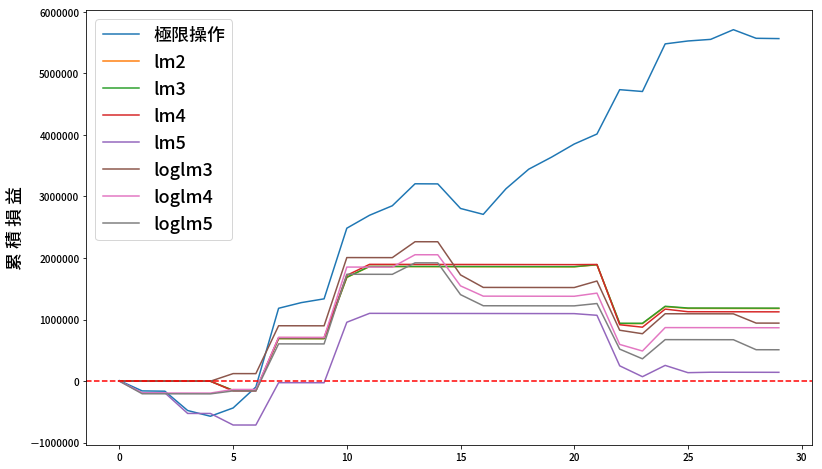

In [407]:
plt.figure(figsize = (13, 8))
plt.plot(max_profit2['累積損益'], label = '極限操作')
plt.plot(lm2_outcome2['累積損益'], label = 'lm2')
plt.plot(lm3_outcome2['累積損益'], label = 'lm3')
plt.plot(lm4_outcome2['累積損益'], label = 'lm4')
plt.plot(lm5_outcome2['累積損益'], label = 'lm5')
plt.plot(loglm3_outcome2['累積損益'], label = 'loglm3')
plt.plot(loglm4_outcome2['累積損益'], label = 'loglm4')
plt.plot(loglm5_outcome2['累積損益'], label = 'loglm5')

plt.axhline(0, color = 'r', linestyle = '--')
plt.ylabel('累 積 損 益', fontsize = 18)
plt.legend(fontsize = 18)